<a href="https://colab.research.google.com/github/PiyushLodhi/deeplearning/blob/master/beaut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from  fastai import *
from fastai.vision import * 

In [0]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [0]:
folder='beautiful'
file = 'url_beautiful.csv'

In [0]:
folder='non_beautiful'
file = 'url_non_beautiful.csv'

In [0]:
path=Path('data1')
dast = path/folder
dast.mkdir(parents=True,exist_ok=True)
path

PosixPath('data1')

In [0]:
path.ls()

[PosixPath('data1/non_beautiful'), PosixPath('data1/beautiful')]

In [0]:
with open('/content/gdrive/My Drive/cri.txt', 'w') as f:
  f.write('b')
  f.close()
  download_images('/content/gdrive/My Drive/cry.txt',dast,max_pics=200)

Error https://i2.wp.com/wennyaulia.com/wp-content/uploads/2016/04/image.jpeg HTTPSConnectionPool(host='i2.wp.com', port=443): Read timed out. (read timeout=4)
Error https://image.yayimages.com/512/photo/small-sad-monkey-sitting-on-the-rope-tied-to-the-tree-trunk-5721712.jpg HTTPSConnectionPool(host='image.yayimages.com', port=443): Read timed out. (read timeout=4)


In [0]:
verify_images(path/'non_beautiful', delete=True, max_size=500)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:967: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:967: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:967: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:967: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:967: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='data1/non_beautiful/00000029.jpg'>
cannot identify image file <_io.BufferedReader name='data1/non_beautiful/00000105.jpg'>


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path,train=".",valid_pct=0.2,ds_tfms=get_transforms(),size=224,num_workers=4).normalize(imagenet_stats)

In [0]:
data.classes

['beautiful', 'non_beautiful']

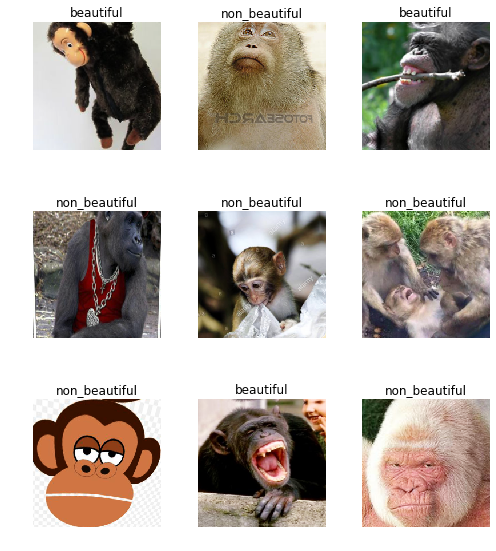

In [0]:
data.show_batch(rows=3,figsize=(7,8))

In [0]:
learn = create_cnn(data,models.resnet34,metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:03<00:00, 24814684.64it/s]


In [0]:
learn.fit_one_cycle(2
                   )

epoch,train_loss,valid_loss,error_rate,time
0,0.921655,0.643007,0.309091,01:17
1,0.738288,0.529371,0.254545,01:19


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()


In [0]:
learn.lr_find()

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2,max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.594784,0.454269,0.218182,01:48
1,0.576913,0.433832,0.218182,01:49
